In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import joblib 
import seaborn as sns

In [3]:
x_train_scalrd = joblib.load('data/x_train_scaled.pk1')
x_test_scaled = joblib.load('data/x_test_scaled.pk1')
y_train = joblib.load('data/y_train.pk1')
y_test = joblib.load('data/y_test.pk1')

In [4]:
knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': list(range(3, 16))}

grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(x_train_scalrd, y_train)

print("Best K:", grid_knn.best_params_)
print("Best accuracy:", grid_knn.best_score_)

Best K: {'n_neighbors': 13}
Best accuracy: 0.8090219639515415


In [5]:
from sklearn.metrics import accuracy_score

y_pred_knn = grid_knn.predict(x_test_scaled)

print("Confusion Metricx (KNN):")
print(confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn))

auc_knn = roc_auc_score(y_test, grid_knn.predict_proba(x_test_scaled)[:,1])
print("ROC-AUC (KNN)", auc_knn)

Confusion Metricx (KNN):
[[96  9]
 [22 52]]

Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.85      0.70      0.77        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179

ROC-AUC (KNN) 0.896074646074646


In [6]:
scores = cross_val_score(grid_knn.best_estimator_, x_train_scalrd, y_train, cv=5)
print("Cross-Validated accuracy (KNN):", scores.mean())

Cross-Validated accuracy (KNN): 0.8090219639515415


In [7]:
import os
os.makedirs('model', exist_ok=True)

In [8]:
joblib.dump(grid_knn.best_estimator_, 'model/knn_model.pk1')

['model/knn_model.pk1']

In [9]:
svm = SVC(probability=True)
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': ['scale', 0.01, 0.001], 'kernel': ['rbf']}
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(x_train_scalrd, y_train)

y_pred_svm = grid_svm.predict(x_test_scaled)
print("Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm))

Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.85      0.70      0.77        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



In [10]:
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {'n_estimators': [50, 100], 'max_depth': [3, 5, None]}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(x_train_scalrd, y_train)

y_pred_rf = grid_rf.predict(x_test_scaled)
print("Classification Report (RF):")
print(classification_report(y_test, y_pred_rf))

Classification Report (RF):
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       105
           1       0.88      0.57      0.69        74

    accuracy                           0.79       179
   macro avg       0.82      0.76      0.76       179
weighted avg       0.81      0.79      0.78       179



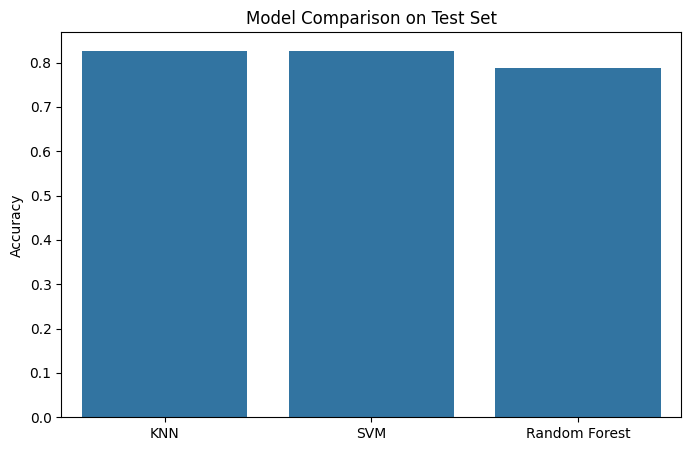

In [11]:
models = ['KNN', 'SVM', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_rf)
]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies)
plt.ylabel('Accuracy')
plt.title('Model Comparison on Test Set')
plt.show()